In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [156]:
from rdkit.Chem import (
    AllChem,
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys
)

In [2]:
bbb_df = pd.read_csv('adenot_processed.csv')
#bbb_df.drop(bbb_df.iloc[:, 3:], inplace=True, axis=1)
bbb_df

,Drug,SMILES,permeable,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACEBUTOLOL,CCCC(=O)Nc1ccc(c(c1)C(C)=O)OCC(O)CNC(C)C,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DACTINOMYCIN,CC(C)[C@H]1NC(=O)[C@@H](NC(=O)c2ccc(c3c2N=C2C(...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ALDOSTERONE,C[C@@]12CCC(=O)C=C2CC[C@H]2C3CC[C@H](C(=O)CO)C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,AMILORIDE,N\C(=N)\NC(=O)c1nc(c(nc1N)N)Cl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AMIODARONE,CCCCc1oc2ccccc2c1C(=O)c1cc(c(c(c1)[I])OCCN(CC)...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,PROXYPHYLLINE,CC(O)Cn1cnc2c1C(=O)N(C)C(=O)N2C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1654,THEOBROMINE,Cn1cnc2c1C(=O)NC(=O)N2C,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1655,AMITRIPTYLINE,CN(C)CCC=C1c2ccccc2CCc2ccccc12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1656,CHLORPROMAZINE,CN(C)CCCN1c2ccccc2Sc2ccc(cc12)Cl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
bbb_df[bbb_df['Drug'] == 'COBALAMINE']

,Drug,SMILES,permeable,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


## Getting Fingerprints

In [4]:
r = 2
d = 1024

fp_list = []
for smile in bbb_df['SMILES']:
    mol = Chem.MolFromSmiles(smile)
    if mol is None:
        print('invalid SMILES')
        bbb_df = bbb_df[bbb_df['SMILES'] != smile]
    else: 
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,r,nBits=d,useChirality=False)
        fp_list.append(fp)

morgan_list = np.array(fp_list)
print(morgan_list.shape)
print(bbb_df.shape)

(1658, 1024)
(1658, 1027)


## K-Means Clustering

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(morgan_list)
cluster_index = kmeans.predict(morgan_list)

In [6]:
bbb_df.insert(3, 'Cluster_Index', cluster_index)
bbb_df

,Drug,SMILES,permeable,Cluster_Index,0,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACEBUTOLOL,CCCC(=O)Nc1ccc(c(c1)C(C)=O)OCC(O)CNC(C)C,0.0,2,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DACTINOMYCIN,CC(C)[C@H]1NC(=O)[C@@H](NC(=O)c2ccc(c3c2N=C2C(...,0.0,4,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ALDOSTERONE,C[C@@]12CCC(=O)C=C2CC[C@H]2C3CC[C@H](C(=O)CO)C...,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,AMILORIDE,N\C(=N)\NC(=O)c1nc(c(nc1N)N)Cl,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AMIODARONE,CCCCc1oc2ccccc2c1C(=O)c1cc(c(c(c1)[I])OCCN(CC)...,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,PROXYPHYLLINE,CC(O)Cn1cnc2c1C(=O)N(C)C(=O)N2C,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1654,THEOBROMINE,Cn1cnc2c1C(=O)NC(=O)N2C,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1655,AMITRIPTYLINE,CN(C)CCC=C1c2ccccc2CCc2ccccc12,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1656,CHLORPROMAZINE,CN(C)CCCN1c2ccccc2Sc2ccc(cc12)Cl,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
count = np.bincount(cluster_index)
index = np.arange(len(count))
number = [i for i in count]
percent = [round(100*i/len(cluster_index), 2) for i in number]
perc_perm = []

for i in index:
    bbb_i = bbb_df[bbb_df['Cluster_Index'] == i]
    num_perm = len(bbb_i[bbb_i['permeable'] == 1])
    perc_perm.append(num_perm/len(bbb_i))

cluster_df = pd.DataFrame(
    {'cluster_index': index,
    'number': number,
    'percentage': percent,
    'percent permeable': perc_perm
    }, index = None)

cluster_df

,cluster_index,number,percentage,percent permeable
0,0,462,27.86,0.965368
1,1,135,8.14,0.000000
2,2,628,37.88,0.909236
3,3,158,9.53,0.981013
4,4,275,16.59,0.527273


## Principal Component Analysis

In [8]:
dim = 100
pca = PCA(n_components=dim)
components = pca.fit_transform(morgan_list)

In [9]:
print("Overall Variance Captured by PCA-1 and PCA-2: ", sum(pca.explained_variance_ratio_[0:2]))
print("50 Principal Components Total Explained Variance: ", sum(pca.explained_variance_ratio_))
print("Fraction of Overall Variance Captured: ",  sum(pca.explained_variance_ratio_[0:2])/sum(pca.explained_variance_ratio_))

Overall Variance Captured by PCA-1 and PCA-2:  0.09747352587759624
50 Principal Components Total Explained Variance:  0.6511154888293919
Fraction of Overall Variance Captured:  0.14970236087124733


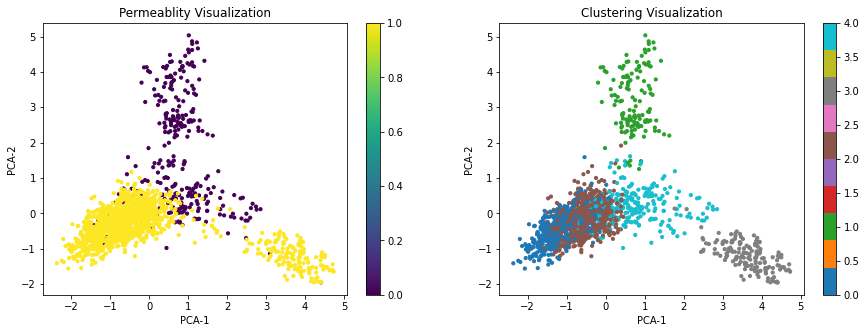

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(components[:,0], components[:,1], c=bbb_df['permeable'],s=10)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Permeablity Visualization')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(components[:,0], components[:,1], c=cluster_index,s=10, cmap='tab10')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Clustering Visualization')
plt.colorbar()

## t-SNE

In [11]:
tsne = TSNE(n_components=2, random_state=0)
t_components = tsne.fit_transform(components)

C:\Users\Jamie Wang\anaconda3\envs\bme590\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jamie Wang\anaconda3\envs\bme590\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


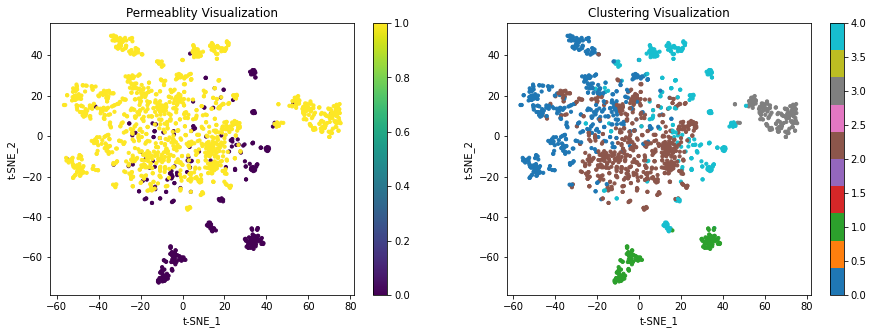

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(t_components[:,0], t_components[:,1], c=bbb_df['permeable'],s=10)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Permeablity Visualization')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(t_components[:,0], t_components[:,1], c=cluster_index,s=10, cmap='tab10')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Clustering Visualization')
plt.colorbar()

## Fragment Dictionary

In [13]:
def get_dictionary(smiles_set, feature_list, feature_weights):
    fragment_dict = {key: [val] for key, val in zip(feature_list, feature_weights)}
    r=2
    d=1024
    for smile in smiles_set:
        m = Chem.MolFromSmiles(smile)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(m,r,d,bitInfo=info)
        for bit in info.keys():
            if bit in feature_list:
                root_atom = info[bit][0][0]
                radius = info[bit][0][1]
                env = Chem.FindAtomEnvironmentOfRadiusN(m,radius,root_atom)
                amap={}
                submol=Chem.PathToSubmol(m,env,atomMap=amap)
                if amap:
                    fragment = Chem.MolToSmiles(submol, rootedAtAtom=amap[root_atom],canonical=False)
                else:
                    fragment = Chem.MolToSmiles(submol)
                if bit not in fragment_dict.keys():
                    fragment_dict[bit] = [fragment]
                elif fragment not in fragment_dict[bit]:
                    fragment_dict[bit].append(fragment)
        
    return fragment_dict

### SVM Features by Cluster

In [14]:
## copied from top 20 SVM model feature importances

important_features = [667,
 980,
 700,
 325,
 767,
 580,
 997,
 798,
 264,
 352,
 672,
 119,
 412,
 1010,
 74,
 646,
 138,
 530,
 828,
 78]

feature_weights = [0.13980670764279488,
 0.1411576319439674,
 0.14438885951173616,
 0.14980977631547177,
 0.15188283208396375,
 0.1578963759879286,
 0.15941575138137315,
 0.1603848006150405,
 0.16090741654153815,
 0.16420089036368543,
 0.16544398887507364,
 0.17031250422707883,
 0.17567167003688294,
 0.17977053927709283,
 0.18259849329630726,
 0.18851372644366476,
 0.19020334053489368,
 0.19446214484841093,
 0.20808202632675638,
 0.23581952457052585]

print(len(important_features))

20


In [15]:
svm_fragment_dict = get_dictionary(bbb_df['SMILES'], important_features[-10:], feature_weights[-10:])

In [16]:
svm_fragment_dict_df = pd.DataFrame.from_dict(svm_fragment_dict, orient="index")
svm_fragment_dict_df = svm_fragment_dict_df.rename(columns={0:'Importance'})
svm_fragment_dict_df.sort_values(by='Importance', ascending=False, inplace=True)
svm_fragment_dict_df

,Importance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
78,0.235820,C(c(c)c)(=O)NC,c(c(C)c)c(c)F,C(NC)(=O)c(c)c,c(c(C)c)(c([nH])c)c(c)C,C(NC)(=O)C(C)(C)C,[C@@](C(C)=C)(C=C)(C)C(C)C,[C@](C(C)C)(C(C)=C)(C=C)C,[C@](C)(C=C)(C(=C)C)C(C)C,[C@](CC)(C)(CC)c(c)c,C(=O)(NC)C(C)(C)C,C(=C(O)c)c(c)c,C(CN)(CO)OC,C(CO)(CN)OC,None,None,None,None
828,0.208082,C(NC)Cc,C(OC)(CC)(OC)CC,S([C@H](C)N)(CC)=O,n(n)(c)-c,C([C@H](c)N)(O)=O,C(N(C)C)(=O)c(c)c,C(Cc)NC,n(c)(n)-c,C(CC)(=C(C)C)C=O,n(n)(C)c,c(n(C)c)(c(c)C)C,C(C)(C)(O)C,None,None,None,None,None
530,0.194462,c(c(n)-c)c(N)c,C(CC)=O,c(c(c)Cl)(cc)Cl,C(C(S)=C)OC,N(c(c)c)C(C)=O,N(C(C)=O)c(c)c,c(c(Cl)c)(cc)Cl,n(C(C)C)(c(=O)c)c(c)c,C([C@H](C)F)(=CC)C(C)(C)C,[C@H](C(C)(C)C)(Cc)N(C)C,n(c(N)c)cc,C(C=C)C(=C)C,c(s)(C)c,None,None,None,None
138,0.190203,C(C)C,[C@@H](C(C)=O)(C)[C@@H](O)C,c(c(C)c)nc,C(NC)(=O)[C@H](N)C,[C@H](C(C)=O)(C)[C@@H](O)C,[C@H]([C@H](C)O)(C)C(=O)C,C(NC)CC,n(N)(c)c,c(c(c)C)nc,C(C=C)(=O)C(=C)Cl,C(CO)[C@@H](O)C,n(nc)(c(n)c)c(c)-c,n(c(-c)c)(c(n)c)nc,None,None,None,None
646,0.188514,c(c)(c)F,c(c(c)O)(c(c)-c)OC,C(N(C)C)c(c)c,C(n(c)c)c(c)c,C(C(C)C)(=O)OC,c(F)(c)c,[N+](=C)([O-])C,N(C(c)(O)c)(CC)CC,[N+]([O-])(=C)C,N(CC)(CC)C(O)(c)c,C(CC)(C)C(C)(C)C,c(CC)(cc)c(c)C,None,None,None,None,None
74,0.182598,C(N(C)C)CN,[nH](c)n,C([C@H](C)N)(=O)OC,[nH](n)c,C(CN)N(C)C,c(c(Br)c)c(c)C,C(C)(C)(c)C,c(c(N)c)cc,N(CC)c(c)c,C(OC)(c(c)c)c(c)c,C(C)(C)(C)c,c(cc)c(c)N,c(cc)c(N)c,[C@]([C@@](O)(C)C)(C(C)(O)C)(C)CC,c(C(C)C)(cc)c(c)Cl,C(c(c)c)(OC)c(c)c,C(C)(C)(C)C
1010,0.179771,c(c)(c)C,c(C)(c)c,c(n(C)c)(=O)n(-c)c,c(c(O)c)c(c)O,c(c)(C)c,c(C(C)c)(cc)cc,O(CC)C(C)(c)c,None,None,None,None,None,None,None,None,None,None
412,0.175672,C(C)(C)(C)C,C(CC)C(N)C,c(c(c)c)(c(c)C)c(n)c,c(c(c)c)(c(n)c)c(C)c,C(O)(Cn)c(c)c,C(C(C)C)=C(C)c,C(N)(C)(C)C,[C@@H](c(c)c)(O)CN,C(c(c)c)(O)CN,O([C@H](O)C)C(C)C,C([C@@H](C)N)CC,n(n)(c)c,n(c)(n)c,C(n(c)c)C(C)=O,None,None,None
119,0.170313,C(CC)(CC)Nc,C(O)(C)C,O(C(C)=O)C(C)(C)C,c(c)(c)[nH],c([nH])(c)c,O(C(C)(C)C)C(C)=O,C(C)(C)O,C(CC)CC,s(c(N)n)c(c)c,S(C)(=O)(=O)N,N(CC)(CC)C(=N)S,C(N(C)c)CN,c(c)([nH])c,c(cc)(cn)Cl,C1(NC)CC1,c(c(N)c)c(c)-c,None
672,0.165444,C([C@](C)(O)C)[C@H](O)C,c(n)(n)c,c(n)(c)[n+],c(n)(c)n,c(n(C)c)(=O)c(c)c,c(c)(n)n,C(C)(F)(F)C,c(n(C)c)(c(c)c)=O,C(C(O)=O)C(C)(C)O,c(c(C)[nH])(c(c)c)CC,c(c(c)C)(c(O)c)C,None,None,None,None,None,None


In [158]:
print(svm_fragment_dict_df.loc[138].values)

[0.19020334053489368 'C(C)C' '[C@@H](C(C)=O)(C)[C@@H](O)C' 'c(c(C)c)nc'
 'C(NC)(=O)[C@H](N)C' '[C@H](C(C)=O)(C)[C@@H](O)C'
 '[C@H]([C@H](C)O)(C)C(=O)C' 'C(NC)CC' 'n(N)(c)c' 'c(c(c)C)nc'
 'C(C=C)(=O)C(=C)Cl' 'C(CO)[C@@H](O)C' 'n(nc)(c(n)c)c(c)-c'
 'n(c(-c)c)(c(n)c)nc' None None None None]


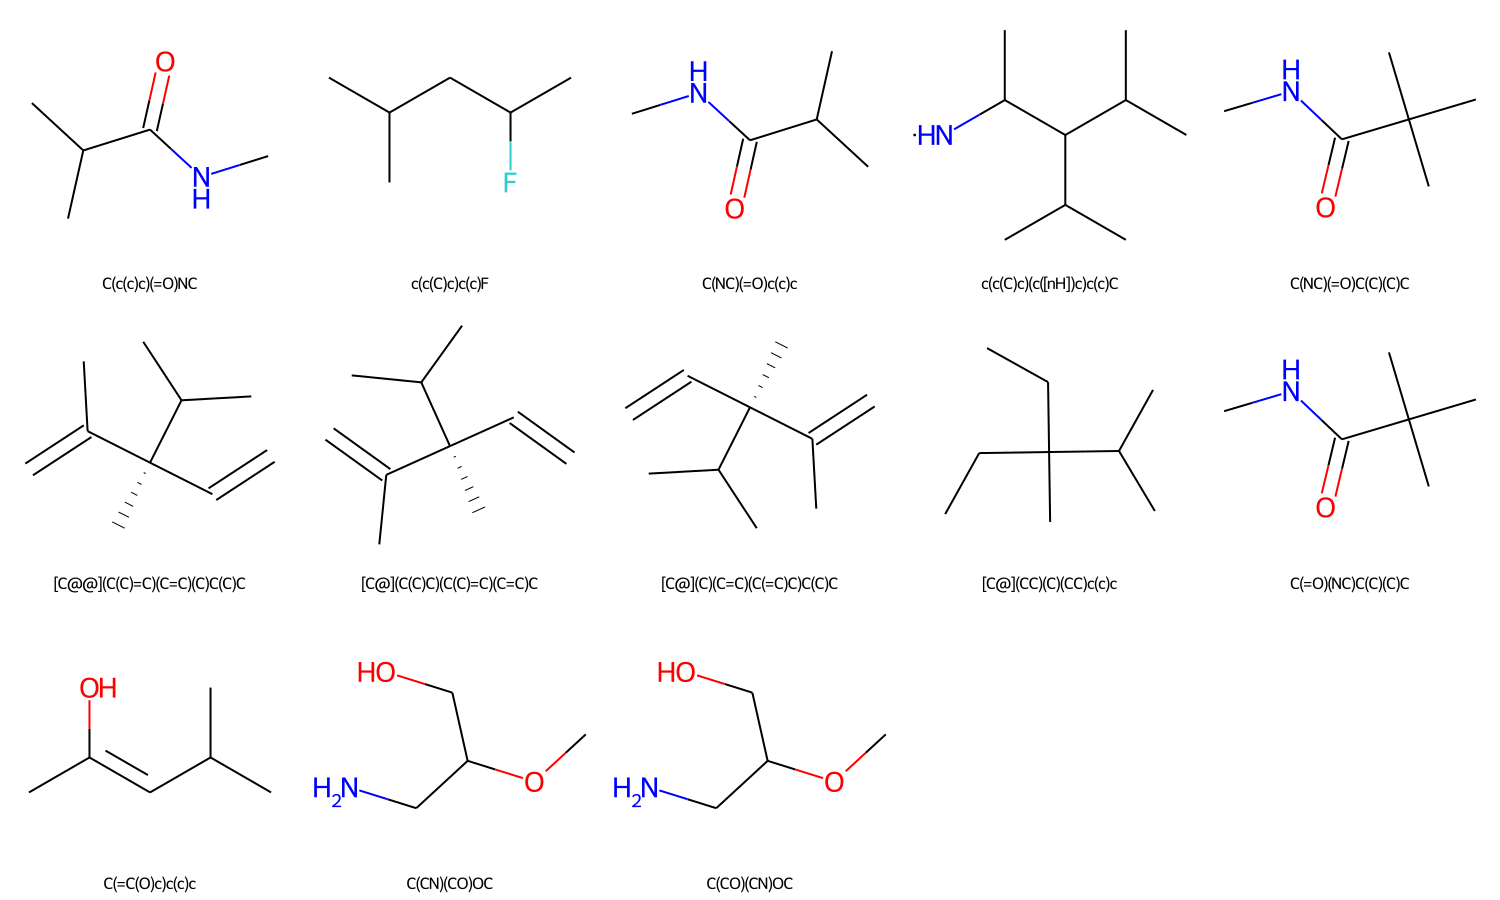

In [168]:
smile_lst = [smile for smile in svm_fragment_dict_df.loc[78].values[1:] if smile]
smile_lst_upp = [smile.upper() for smile in smile_lst]
mol_lst = [Chem.MolFromSmiles(smile) for smile in smile_lst_upp]

Draw.MolsToGridImage(
    mol_lst, 
    molsPerRow=5, 
    subImgSize=(300, 300), 
    legends= smile_lst
)

In [125]:
svm_cluster_df = cluster_df.copy()
for feature in important_features[-10:]:
    feature_perc = []
    feature = str(feature)
    for i in index:
        bbb_i = bbb_df[bbb_df['Cluster_Index'] == i]
        num_on = len(bbb_i[bbb_i[feature] == 1])
        feature_perc.append(num_on/len(bbb_i))
    svm_cluster_df[feature] = feature_perc
    

svm_cluster_df = svm_cluster_df.T
svm_cluster_df.columns = svm_cluster_df.iloc[0]
svm_cluster_df.drop(['cluster_index', 'number', 'percentage', 'percent permeable'], inplace=True)

In [126]:
svm_cluster_df

cluster_index,0.0,1.0,2.0,3.0,4.0
672,0.015152,0.007407,0.042994,0.000000,0.021818
119,0.090909,0.000000,0.052548,0.018987,0.090909
412,0.008658,0.014815,0.015924,0.879747,0.029091
1010,0.030303,0.000000,0.014331,0.000000,0.010909
74,0.164502,0.014815,0.073248,0.012658,0.058182
646,0.114719,0.000000,0.050955,0.006329,0.065455
138,0.134199,0.037037,0.084395,0.443038,0.269091
530,0.032468,0.014815,0.015924,0.006329,0.018182
828,0.006494,0.014815,0.006369,0.025316,0.018182
78,0.002165,0.000000,0.015924,0.126582,0.025455


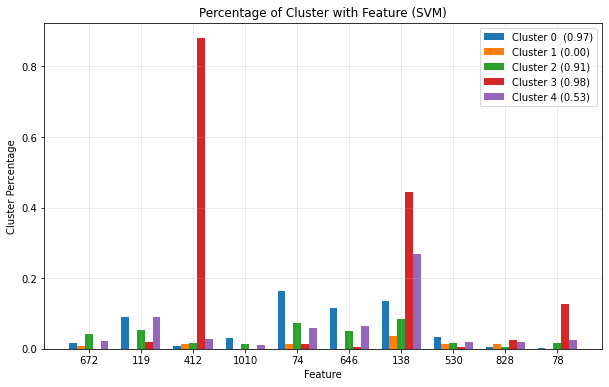

In [152]:
plt.figure(figsize=(10, 6))
xaxis = np.arange(len(svm_perm_df))
width=0.15
plt.bar(xaxis-2*width, svm_cluster_df[0], 
        label='Cluster 0  ({:.2f})'.format(cluster_df['percent permeable'][0]), width=width)
plt.bar(xaxis-width, svm_cluster_df[1], 
        label='Cluster 1 ({:.2f})'.format(cluster_df['percent permeable'][1]), width=width)
plt.bar(xaxis, svm_cluster_df[2], 
        label='Cluster 2 ({:.2f})'.format(cluster_df['percent permeable'][2]), width=width)
plt.bar(xaxis+width, svm_cluster_df[3], 
        label='Cluster 3 ({:.2f})'.format(cluster_df['percent permeable'][3]), width=width)
plt.bar(xaxis+2*width, svm_cluster_df[4], 
        label='Cluster 4 ({:.2f})'.format(cluster_df['percent permeable'][4]), width=width)
plt.xticks(xaxis, svm_perm_df.index, fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Cluster Percentage')
plt.title('Percentage of Cluster with Feature (SVM)')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('Figures/perc_cluster_svm')

In [78]:
svm_perm_df = pd.DataFrame()
for feature in important_features[-10:]:
    feature_perm = []
    feature = str(feature)
    for i in range(0,2):
        num_on = len(bbb_df[(bbb_df[feature] == 1) & (bbb_df['permeable'] == i)])
        feature_perm.append(num_on/len(bbb_df[bbb_df['permeable'] == i]))
    svm_perm_df[feature] = feature_perm
    
svm_perm_df.rename(index={0: "Not Permeable", 1: "Permeable"}, inplace=True)
svm_perm_df = svm_perm_df.T

In [79]:
svm_perm_df

,Not Permeable,Permeable
672,0.020528,0.025816
119,0.038123,0.068337
412,0.023460,0.117692
1010,0.002933,0.018983
74,0.023460,0.101746
646,0.017595,0.074412
138,0.061584,0.184510
530,0.020528,0.019742
828,0.014663,0.009871
78,0.008798,0.026576


From this we can gather that 412 and 138 are significant features in predicting that a molecules IS PERMEABLE. Similarly, these features are both highly present in cluster 3.

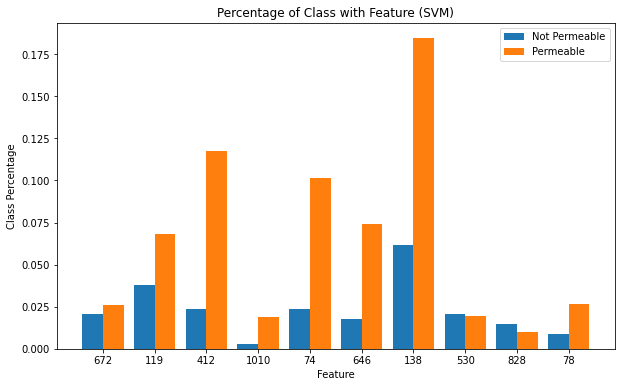

In [153]:
plt.figure(figsize=(10, 6))
xaxis = np.arange(len(svm_perm_df))
width=0.4
plt.bar(xaxis-0.2, svm_perm_df['Not Permeable'], label='Not Permeable', width=width)
plt.bar(xaxis+0.2, svm_perm_df['Permeable'], label='Permeable', width=width)
plt.legend()
plt.xticks(xaxis, svm_perm_df.index, fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Class Percentage')
plt.title('Percentage of Class with Feature (SVM)')
plt.savefig('Figures/perc_class_svm')

### XGBoost Features by Cluster

In [21]:
xgb_important_features = ['872',
 '272',
 '399',
 '215',
 '919',
 '829',
 '675',
 '722',
 '808',
 '299',
 '658',
 '606',
 '410',
 '723',
 '430',
 '253',
 '5',
 '357',
 '463',
 '387']
xgb_important_features = [int(val) for val in xgb_important_features]

xgb_feature_weights = [0.015752477571368217,
 0.016555923968553543,
 0.01881934329867363,
 0.01907920651137829,
 0.019553540274500847,
 0.01987210474908352,
 0.01992880366742611,
 0.020168544724583626,
 0.021855978295207024,
 0.022811098024249077,
 0.025636112317442894,
 0.02843727357685566,
 0.029737655073404312,
 0.03191596642136574,
 0.03313911706209183,
 0.03845033794641495,
 0.05527280271053314,
 0.05980795994400978,
 0.0838354155421257,
 0.09129146486520767]

In [22]:
xgb_fragment_dict = get_dictionary(bbb_df['SMILES'], xgb_important_features[-10:], xgb_feature_weights[-10:])

In [23]:
xgb_fragment_dict_df = pd.DataFrame.from_dict(xgb_fragment_dict, orient="index")
xgb_fragment_dict_df = xgb_fragment_dict_df.rename(columns={0:'Importance'})
xgb_fragment_dict_df.sort_values(by='Importance', ascending=False, inplace=True)
xgb_fragment_dict_df

,Importance,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
387,0.091291,N(C)C,[C@@H](C)(O)C,c(c(C)c)(cc)[N+]([O-])=O,c(cn)nc,C(CC)(=O)OC,C(OC)(=O)CC,C(C(=C)C)(O)=O,c(c(c)O)c(c)c,C(=CC)(C)C(=C)C,...,c(C(N)=O)(nc)c(n)C,None,None,None,None,None,None,None,None,None
463,0.083835,C(C)(O)C,c(cc)(cc)F,[C@H](C)(O)C,,c(c(c)O)(c(c)C)C(c)=O,c(c(C)c)(cc)Cl,c(c(C)n)c(c)c,[C@@H](N(C)c)(CC)[C@@H](C)N,C(=CC)C(C)(C)C,...,C(C)(C)(C)C,O(CC)C(=O)O,[C@@H](C)(S)C,n(C)(cn)c(c)c,None,None,None,None,None,None
357,0.059808,c(nc)(cc)c(c)n,C(N=C)#N,c(c(n)c)(cc)nc,O(C)C,C(C)(S)S,C(CC)C=C,s(c(N)n)c(c)c,[C@H](C[S+])(OC)[C@H](C)O,c(c(n)C)(c(n)N)CC,...,None,None,None,None,None,None,None,None,None,None
5,0.055273,C(N)(=O)C,[C@H](NC)(CC)C(=O)N,C(C)(=O)N,[C@@H](C(C)C)(O)CC,C(C)(=C)C,C(S)c,C(NC)(=O)N(C)C,c(C(C)=C)(cc)cc,O(C(C)=O)[C@@H](C)C,...,None,None,None,None,None,None,None,None,None,None
253,0.038450,C(C)(C)C,n(c(c)c)(cc)C(C)C,C(=N/C)\N(C)C,C(=C(S)C)(N(C)C)C(O)=O,[C@@H](OC)([C@@H](C)C)[C@](C)(O)C,C(c(c)c)(=O)C(=C)C,C(C(C)=C)(=O)c(c)c,C(C(=C)C)(=O)c(c)c,C(CN)(N)=O,...,c(cc)(c(c)O)OC,C(CN)NC,n(cc)(C(C)C)c(c)c,c(cc)(c(O)c)OC,[C@@H](CC)(SC)[C@@H](N)C,None,None,None,None,None
430,0.033139,C(CO)(O)CN,C(C)C,C(CN)(O)CO,[C@H](C)(O)[C@H](C)C,[C@H]([C@H](C)C)(C)O,[C@@H](C)(O)[C@H](C)C,c(c(c)O)c(Cl)c,C(CN)Cc,C(Cc)CN,...,None,None,None,None,None,None,None,None,None,None
723,0.031916,c(c)(c)-c,c(c)(C)c,C(c(c)c)([C@H](C)C)c(c)c,c(c(c)c)(c(F)c)C,c(c)(c)C,C(CN)O,N1(C(=C)C)[C@H](S)CC1=O,c(-c)(c)c,c(C)(c)c,...,C(F)(F)O,c(N(C)C)(cn)nc,c(cc)(cc)Cl,c(c)(-c)c,N(C(C)(C)C)(CC)C(C)N,C(C(C)(C)C)C(C)(C)C,None,None,None,None
410,0.029738,[C@H]1(CN)N[C@H]1C,C(C(N)=O)(=CC)C,c([C@H](C)O)(cc)cc,c(C(C)O)(cc)cc,c(c(C)c)(c(c)O)C(=O)C,C(=CC)(C)C(=O)N,O(CC)C(c)C,c(cc)(cc)[C@H](O)C,C(N(C)C)(c(c)c)c(c)c,...,[nH](c(c)C)c(c)C,c(cc)(cc)C(O)C,c(n(-c)c)(nc)C,c(C)(nc)n(c)-c,C(CN)(C)(C)c(c)c,None,None,None,None,None
606,0.028437,C(C)N,c(C(O)=O)(cc)cc,C(N)C,[C@@H](CC)(O)[C@H](C)N,C(C[N+])CC,s(c(N)n)c(c)C,C(Cc)S(O)(=O)=O,C(C)(O)(C)C,c(cc)(c(c)O)NC,...,C(=O)(N(C)C)c(c)n,O(C(C)C)C(N)=O,O(C(C)C)C(=O)N,C([C@@H](C)C)CO,C(=C(C)N)CC,c(C(=O)O)(cc)cc,C(C(C)(C)C)OC,c(c([n+])-c)(cc)c(c)c,C(OC)C(C)(C)C,C(NC)(=S)NC
658,0.025636,C(Oc)C(O)C,c(cc)(c(c)C)-c(c)c,C(C)(C)(C)NC,C(C(C)O)Oc,C(NC)(C)(C)C,c(c(C)n)sc,C(C(O)=O)(CO)c(c)c,C(NC)(=O)C(C)(C)O,N(C(C)=O)CC,...,C(C(C)(O)C)(=O)C(=C)C,[C@@H](C(O)=O)(CO)c(c)c,O(C(=C)C)C(c)(c)N,C(C)(O)O,None,None,None,None,None,None


In [109]:
xgb_cluster_df = cluster_df.copy()

for feature in xgb_important_features[-10:]:
    feature_perc = []
    feature = str(feature)
    for i in index:
        bbb_i = bbb_df[bbb_df['Cluster_Index'] == i]
        num_on = len(bbb_i[bbb_i[feature] == 1])
        feature_perc.append(num_on/len(bbb_i))
    xgb_cluster_df[feature] = feature_perc
    
xgb_cluster_df = xgb_cluster_df.T
xgb_cluster_df.columns = xgb_cluster_df.iloc[0]
xgb_cluster_df.drop(['cluster_index', 'number', 'percentage', 'percent permeable'], inplace=True)

In [110]:
xgb_cluster_df

cluster_index,0.0,1.0,2.0,3.0,4.0
658,0.008658,0.022222,0.020701,0.018987,0.083636
606,0.015152,0.029630,0.039809,0.018987,0.101818
410,0.015152,0.000000,0.017516,0.000000,0.047273
723,0.021645,0.037037,0.025478,0.006329,0.178182
430,0.015152,0.059259,0.017516,0.000000,0.061818
253,0.015152,0.029630,0.019108,0.006329,0.094545
5,0.030303,0.918519,0.025478,0.000000,0.065455
357,0.008658,0.007407,0.011146,0.000000,0.210909
463,0.034632,0.081481,0.027070,0.006329,0.280000
387,0.021645,0.822222,0.014331,0.018987,0.120000


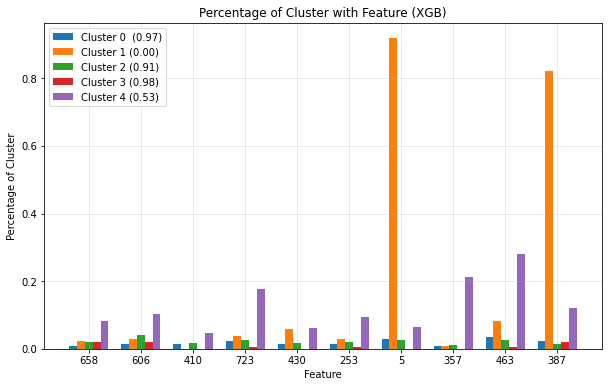

In [154]:
plt.figure(figsize=(10, 6))
xaxis = np.arange(len(xgb_perm_df))
width=0.15
plt.bar(xaxis-2*width, xgb_cluster_df[0], 
        label='Cluster 0  ({:.2f})'.format(cluster_df['percent permeable'][0]), width=width)
plt.bar(xaxis-width, xgb_cluster_df[1], 
        label='Cluster 1 ({:.2f})'.format(cluster_df['percent permeable'][1]), width=width)
plt.bar(xaxis, xgb_cluster_df[2], 
        label='Cluster 2 ({:.2f})'.format(cluster_df['percent permeable'][2]), width=width)
plt.bar(xaxis+width, xgb_cluster_df[3], 
        label='Cluster 3 ({:.2f})'.format(cluster_df['percent permeable'][3]), width=width)
plt.bar(xaxis+2*width, xgb_cluster_df[4], 
        label='Cluster 4 ({:.2f})'.format(cluster_df['percent permeable'][4]), width=width)
plt.xticks(xaxis, xgb_perm_df.index, fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Percentage of Cluster')
plt.title('Percentage of Cluster with Feature (XGB)')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('Figures/perc_cluster_xgb')

In [93]:
xgb_perm_df = pd.DataFrame()
for feature in xgb_important_features[-10:]:
    feature_perm = []
    feature = str(feature)
    for i in range(0,2):
        num_on = len(bbb_df[(bbb_df[feature] == 1) & (bbb_df['permeable'] == i)])
        feature_perm.append(num_on/len(bbb_df[bbb_df['permeable'] == i]))
    xgb_perm_df[feature] = feature_perm
    
xgb_perm_df.rename(index={0: "Not Permeable", 1: "Permeable"}, inplace=True)
xgb_perm_df = xgb_perm_df.T

In [94]:
#Displays the percentage of not permeable/permeable molecules that have that feature bit ON
xgb_perm_df

,Not Permeable,Permeable
658,0.102639,0.008352
606,0.129032,0.017464
410,0.049853,0.010630
723,0.173021,0.016705
430,0.090909,0.009112
253,0.099707,0.012149
5,0.434018,0.018223
357,0.190616,0.003797
463,0.243402,0.029613
387,0.428152,0.015186


From this we can interpret that the model is making predictions of what will be a NON PERMEABLE molecule. This is indicated by the high prevalence of important features that are indicative of a non permeable molecule. Features 387 and 5 are the most abundant.

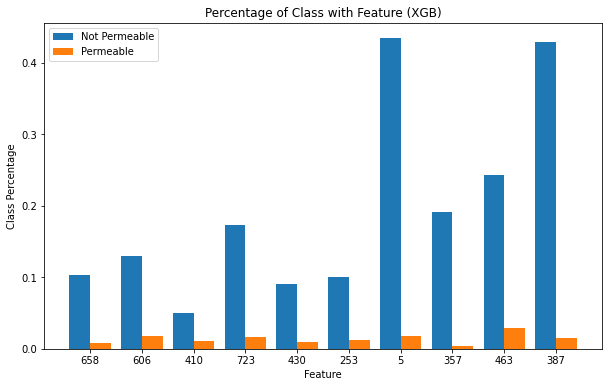

In [155]:
plt.figure(figsize=(10, 6))
xaxis = np.arange(len(xgb_perm_df))
width=0.4
plt.bar(xaxis-0.2, xgb_perm_df['Not Permeable'], label='Not Permeable', width=width)
plt.bar(xaxis+0.2, xgb_perm_df['Permeable'], label='Permeable', width=width)
plt.xticks(xaxis, xgb_perm_df.index, fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Class Percentage')
plt.title('Percentage of Class with Feature (XGB)')
plt.legend()
plt.savefig('Figures/perc_class_xgb')

## Get Fragments By Cluster
### + Scaffold Analysis

In [28]:
from rdkit.Chem import (
    AllChem,
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys
)

In [244]:
def get_fragments(smiles_set, feature_list):
    fragments_df = pd.DataFrame(columns=['Fragment', 'Count', 'Feature'])
    r=2
    d=1024
    for smile in smiles_set:
        m = Chem.MolFromSmiles(smile)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(m,r,d,bitInfo=info)
        fragments = []
        for bit in info.keys():
            if bit in feature_list:
                root_atom = info[bit][0][0]
                radius = info[bit][0][1]
                env = Chem.FindAtomEnvironmentOfRadiusN(m,radius,root_atom)
                amap={}
                submol=Chem.PathToSubmol(m,env,atomMap=amap)
                if amap:
                    fragment = Chem.MolToSmiles(submol, rootedAtAtom=amap[root_atom],canonical=False)
                else:
                    fragment = Chem.MolToSmiles(submol)
                fragments.append([fragment, bit])
                
        for fragment, bit in fragments:
            if ((fragments_df['Fragment'] == fragment) & (fragments_df['Feature'] == bit)).any():
                index = fragments_df.index[(fragments_df['Fragment'] == fragment) & (fragments_df['Feature'] == bit)]
                fragments_df.at[index[0],'Count'] = fragments_df.at[index[0],'Count'] + 1
            else:
                row = {'Fragment': [fragment], 'Count': [1], 'Feature': [bit]}
                row_df = pd.DataFrame(data=row)
                fragments_df = pd.concat([fragments_df, row_df], ignore_index=True)
    return fragments_df

In [240]:
def cluster_fragments(cluster_df, features):
    fragments = get_fragments(cluster_df['SMILES'], features)
    fragments = fragments.sort_values(by=['Count'], ascending=False)
    mol = [Chem.MolFromSmiles(s) for s in cluster_df['SMILES'].values[:10]]
    grid = Draw.MolsToGridImage(
        mol, 
        molsPerRow=5, 
        subImgSize=(300, 300), 
        legends=cluster_df['Drug'].values.tolist()[:10]
    )
    return fragments, grid

In [295]:
def draw_fragments(df, feature):
    smile_lst = [smile for smile in df[df['Feature'] == feature]['Fragment']]
    mol_lst = [Chem.MolFromSmiles(smile) for smile in smile_lst]
    print(mol_lst)
    return Draw.MolsToGridImage(
        mol_lst, 
        molsPerRow=5, 
        subImgSize=(300, 300), 
        legends= smile_lst
    )

### Cluster 0

In [245]:
fragments_c0, grid_c0 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 0], important_features)

### Cluster 1

In [310]:
fragments_c1, grid_c1 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 1], xgb_important_features)

In [311]:
fragments_c1.head(20)

,Fragment,Count,Feature
3,,132,675
2,N(C)C,123,387
4,C(C)(=O)N,75,5
0,C(N)(=O)C,54,5
10,C(C)(=C)C,51,872
5,N1(C(C)C)[C@H](S)CC1=O,48,919
6,c(c(C)c)cc,14,829
11,,10,463
7,N1(C(C)C)C(S)CC1=O,6,919
17,c(SC)(nn)n(n)C,5,399


[<rdkit.Chem.rdchem.Mol object at 0x0000013C05EBC280>, <rdkit.Chem.rdchem.Mol object at 0x0000013C05EBC100>]


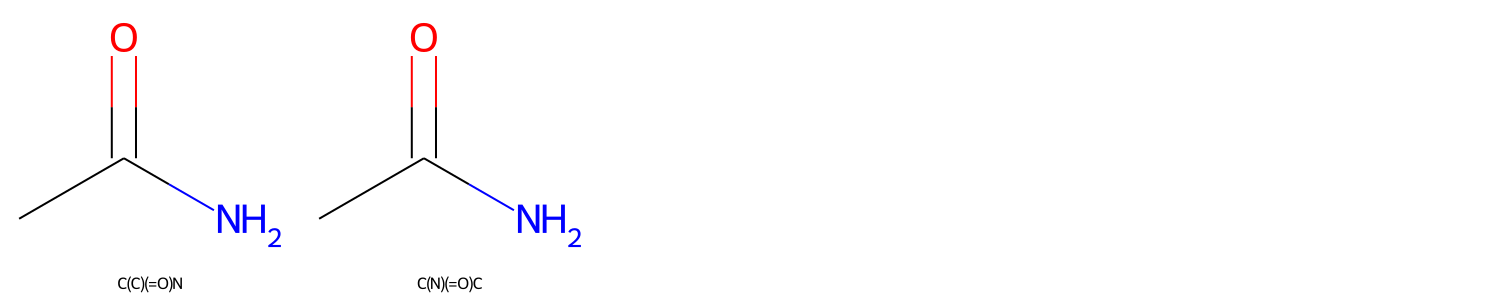

In [303]:
draw_fragments(fragments_c1, 5)

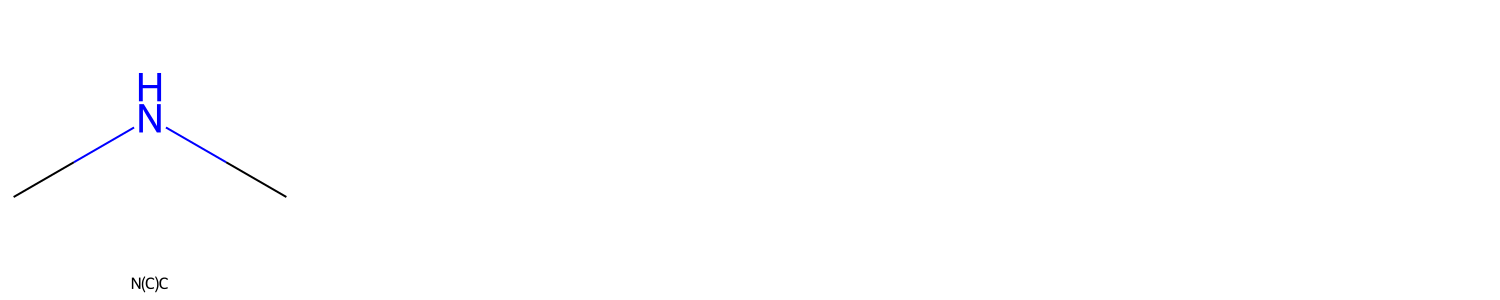

In [304]:
draw_fragments(fragments_c1, 387)

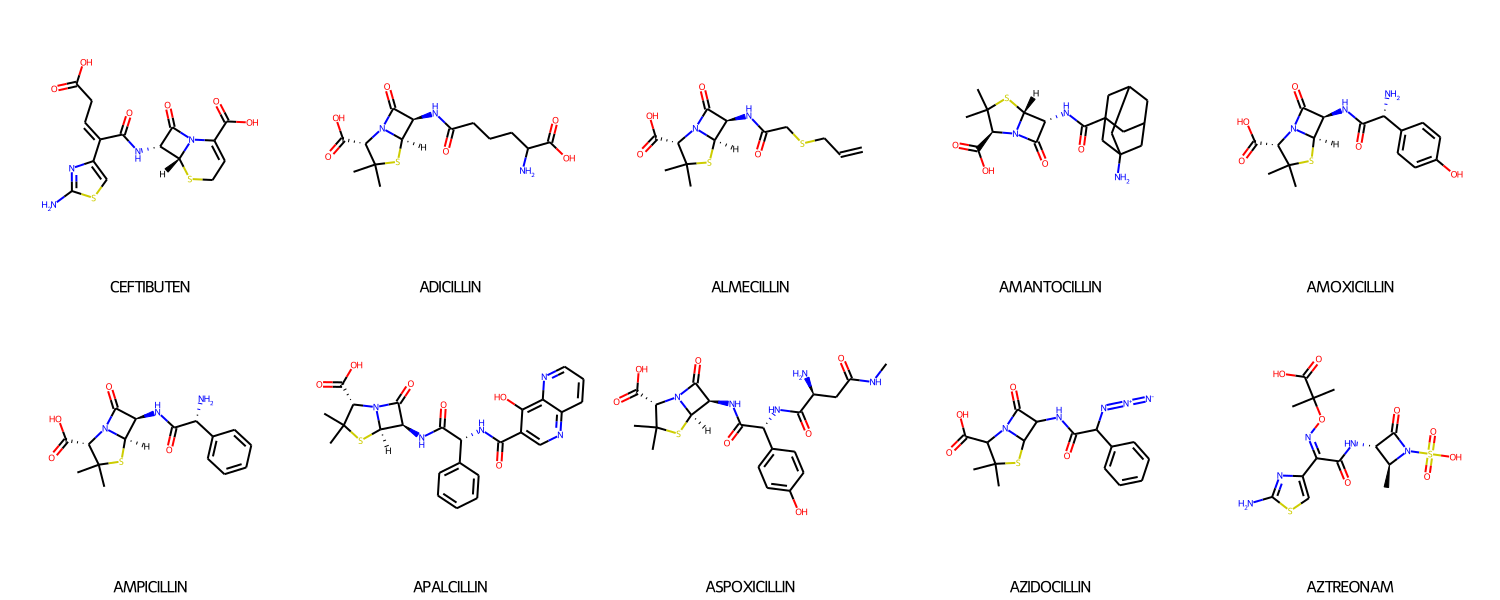

In [250]:
grid_c1

### Cluster 2

In [251]:
fragments_c2, grid_c2 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 2], important_features)

### Cluster 3

In [254]:
fragments_c3, grid_c3 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 3], important_features)

In [255]:
fragments_c3.head(20)

,Fragment,Count,Feature
1,C(C)(C)(C)C,143,412
3,C(C(C)=O)=CC,110,997
2,C(C)(C)(C)C,84,767
0,C(C)C,67,138
7,C(O)C,31,980
10,C(C)O,28,980
4,C(CC)[C@](O)(C)C,22,580
5,[C@@](C(C)=C)(C=C)(C)C(C)C,17,78
13,C([C@@](C)(O)C)CC,16,580
6,O(C(C)=O)CC,13,264


[<rdkit.Chem.rdchem.Mol object at 0x0000013C05E2ACE0>, <rdkit.Chem.rdchem.Mol object at 0x0000013C05E2AE00>, <rdkit.Chem.rdchem.Mol object at 0x0000013C05E84820>]


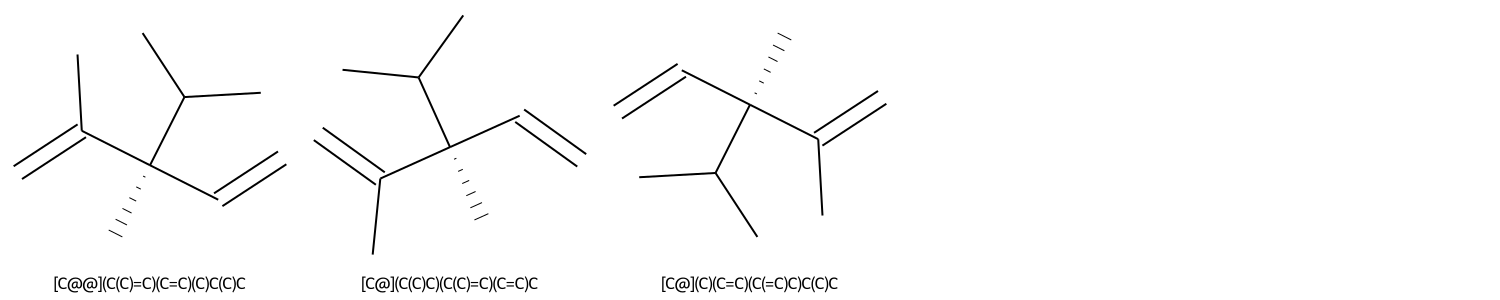

In [296]:
draw_fragments(fragments_c3, 78)

[<rdkit.Chem.rdchem.Mol object at 0x0000013C05E87A00>, <rdkit.Chem.rdchem.Mol object at 0x0000013C05EBCF40>]


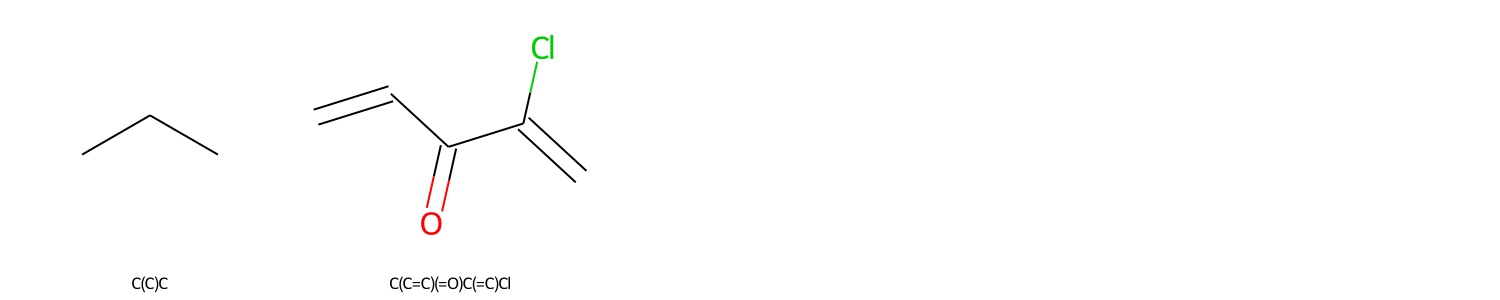

In [306]:
draw_fragments(fragments_c3, 138)

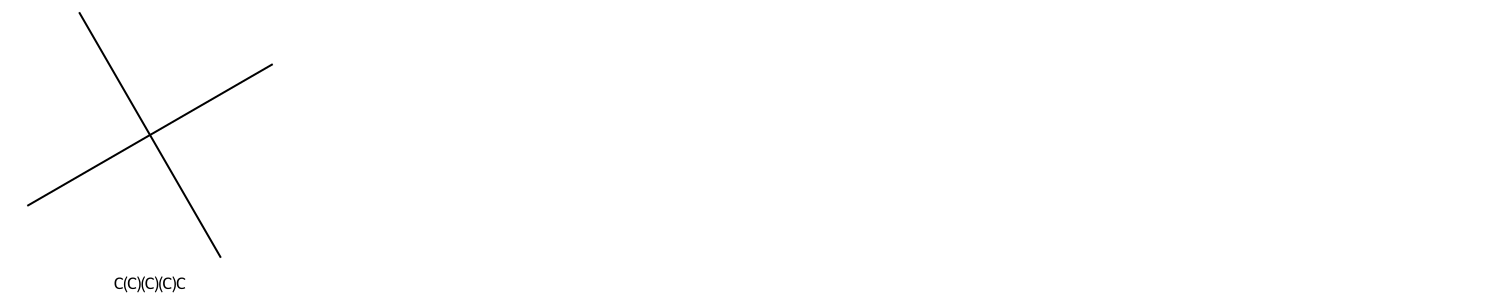

In [300]:
draw_fragments(fragments_c3, 412)

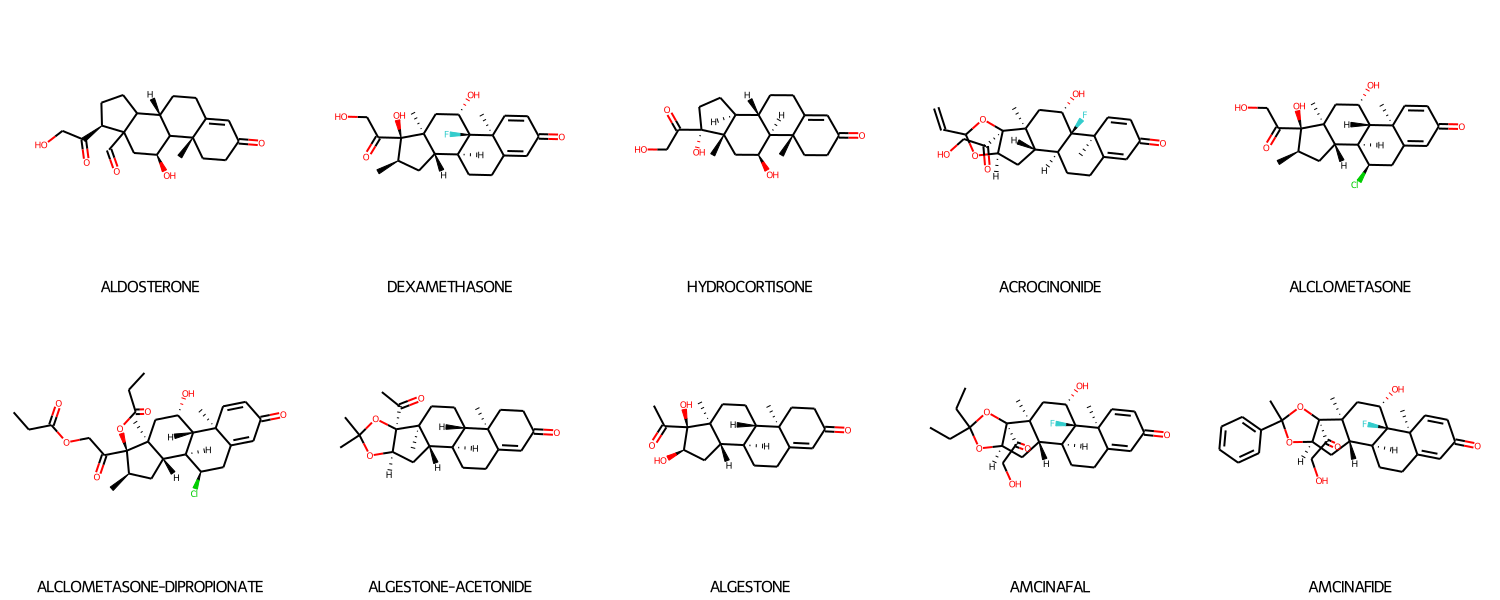

In [191]:
grid_c3

### Cluster 4

In [43]:
fragments_c4, grid_c4 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 4], important_features)

In [44]:
fragments_c4.head(20)

,Fragment,Count
22,c([nH])(c)c,14
6,c(c)(c)C,12
42,N(C)(C)C,11
77,C(c(c)c)[C@H](C)N,10
83,C(C)(C)(c)C,10
68,C([C@H](C)N)c(c)c,9
75,C(c)(C)(C)C,8
19,[C@H](O)(C)C,8
16,C(N)C,8
18,c(C)(c)c,8


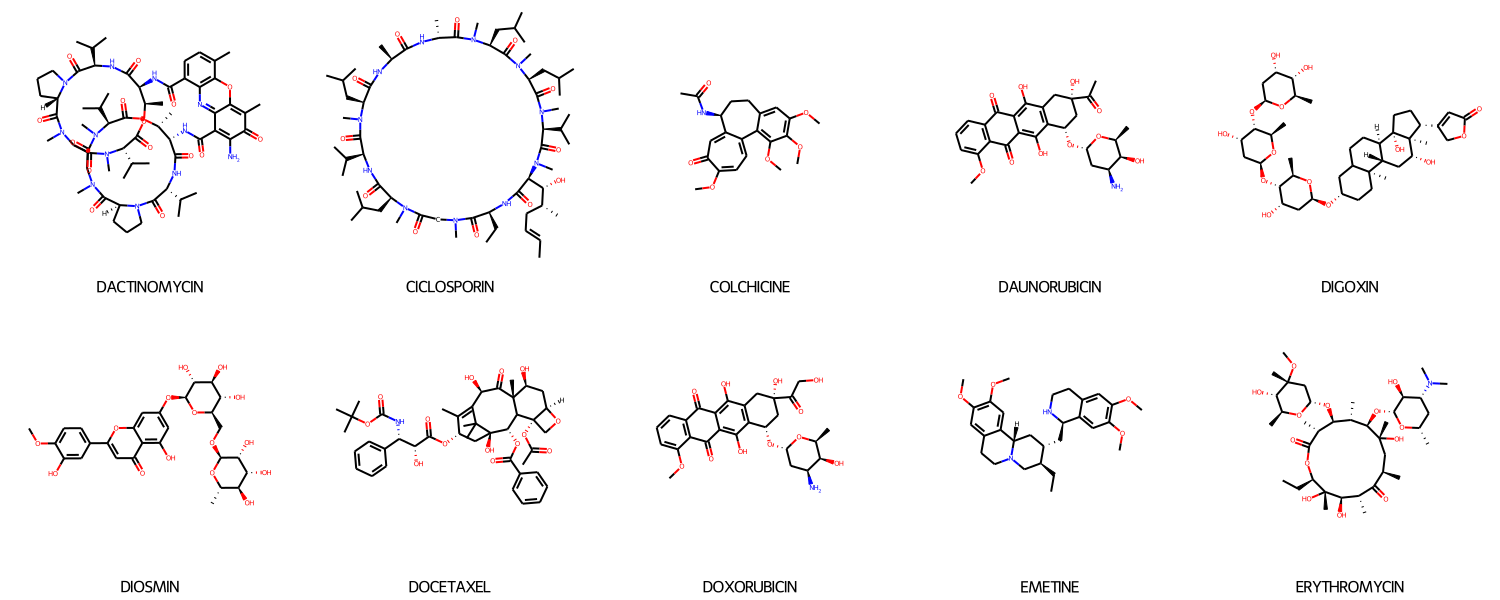

In [45]:
grid_c4

In [46]:
bbb_df[bbb_df['Drug'] == 'AMOXICILLIN']['SMILES'].values

array(['CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(cc3)O)C(=O)N2[C@H]1C(O)=O'],
      dtype=object)